<a href="https://colab.research.google.com/github/abhilashpanda04/Sentiment_Analysis-with-Bert/blob/main/transformers_bert_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from google.colab import files
# import time

# uploaded = files.upload(r'/content/kaggle.json')

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
# # Then move kaggle.json into the folder where the API expects to find it.
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
# time.sleep(120)

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/'

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 136MB/s]


In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!unzip /content/sentiment-analysis-on-movie-reviews.zip

Archive:  /content/sentiment-analysis-on-movie-reviews.zip
  inflating: sampleSubmission.csv    
  inflating: test.tsv.zip            
  inflating: train.tsv.zip           


In [ ]:
import zipfile
with zipfile.ZipFile('./test.tsv.zip','r') as zipref:
  zipref.extractall('./') #Extracting the kaggle files 

In [ ]:
with zipfile.ZipFile('./train.tsv.zip','r') as zipref:
  zipref.extractall('./')#Extracting the kaggle files 

In [ ]:
import pandas as pd
df=pd.read_csv('/content/train.tsv',sep='\t')
df.head()#loading into a dataframe

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


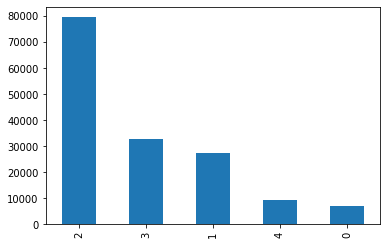

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')#checking the distribution of the labels

In [ ]:
seq_len=512
num_samples=len(df)

num_samples,seq_len

(156060, 512)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 33.1 MB/s 
     |████████████████████████████████| 6.6 MB 49.5 MB/s 
     |████████████████████████████████| 120 kB 61.0 MB/s 


In [ ]:
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-cased')
tokens=tokenizer(df['Phrase'].tolist(),#converting the senetnece to a list of strings
                 max_length=seq_len,#maximum length is set for tokenization
                 truncation=True,#if token is more than 512 adding trucation
                 padding='max_length',#adding padding
                 add_special_tokens=True,#adding special tokens
                 return_tensors='np')# getting a numpy array

In [ ]:
tokens

{'input_ids': array([[  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       ...,
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101, 22572, 12148, ...,     0,     0,     0]]), 'token_type_ids': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])}

In [ ]:
tokens.keys()#checking what are the keys in the tokenzier o/p

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
tokens['input_ids'] #101 is the begining token

array([[  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       ...,
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101, 22572, 12148, ...,     0,     0,     0]])

In [ ]:
tokens['attention_mask'] #1 means a token is present in the position

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
import numpy as np

with open('movie-xids.npy','wb') as f:
  np.save(f,tokens['input_ids'])
with open('movie-xmask.npy','wb') as f:
  np.save(f,tokens['attention_mask'])


In [ ]:
arr=df['Sentiment'].values
arr.shape

(156060,)

In [ ]:
arr.max()+1

5

In [ ]:
labels=np.zeros((num_samples,arr.max()+1))
labels.shape#setting labels to 0 with shape arra.max()+1 for the shapes of label index starts with 0

(156060, 5)

In [ ]:
labels[np.arange(num_samples),arr]=1 # labeling the labels as 1 for one hot encoding

In [ ]:
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
with open('movie-labels.npy','wb') as f:
  np.save(f,labels)


In [ ]:
with open('/content/movie-xids.npy','rb') as f:
  x_ids=np.load(f,allow_pickle=True)
with open('/content/movie-xmask.npy','rb') as f:
  x_mask=np.load(f,allow_pickle=True)
with open('/content/movie-labels.npy','rb') as f:
  x_label=np.load(f,allow_pickle=True) #saving input masj and label as numpy array

In [ ]:
x_ids.shape

(156060, 512)

In [ ]:
import tensorflow as tf
dataset=tf.data.Dataset.from_tensor_slices((x_ids,x_mask,x_label))#creating a dataset with tendorflow

In [ ]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(512,), dtype=tf.int64, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
def map_func(input_ids,mask,labels):
  return {
      "input_ids":input_ids,
      "attention_mask":mask
  },labels

In [ ]:
dataset=dataset.map(map_func) #mapping the function

In [ ]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int64, name=None)}, TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
batch_size=16
dataset=dataset.shuffle(10000).batch(batch_size,drop_remainder=True) #shiffling the data points #drop remainder to make it a whole number

In [ ]:
dataset.take(1) #take 1 method to check how the transformation looks like 

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))>

In [ ]:
split=0.9 #split size

In [ ]:
size=int((x_ids.shape[0]/batch_size) *split ) 

In [ ]:
train_ds=dataset.take(size)#select training set
val_ds=dataset.skip(size) #skipping the training set to have validation set

In [ ]:
tf.data.experimental.save(train_ds,'train')
tf.data.experimental.save(val_ds,'val')

In [ ]:
train_ds.element_spec #checking element spec of train

({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None),
  'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)},
 TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

In [ ]:
val_ds.element_spec #checking element spec of validation

({'input_ids': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None),
  'attention_mask': TensorSpec(shape=(16, 512), dtype=tf.int64, name=None)},
 TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

In [ ]:
train_ds.element_spec==val_ds.element_spec

True

In [ ]:
from transformers import TFAutoModel
bert=TFAutoModel.from_pretrained('bert-base-cased') #using bert-base-cased with tf automodel 

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bert.summary() #108,310,272 are traininble parameters which is huge for training we will reduce the same

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf


# inputs_ids
input_ids=tf.keras.layers.Input(shape=(512,),name="input_ids",dtype='int32')#input_ids which is tokenised input with special tokens

mask=tf.keras.layers.Input(shape=(512,),name="attention_mask",dtype='int32') #attention mask layer

#transformers layer selection from bert

embeddings=bert.bert(input_ids,attention_mask=mask)[1]


#add the classifiocation head

x=tf.keras.layers.Dense(1024,activation='relu')(embeddings)
y=tf.keras.layers.Dense(5,activation='softmax',name='outputs')(x)

In [ ]:
model=tf.keras.Model(inputs=[input_ids,mask],outputs=y)#customising input and output

In [ ]:
model.layers[2].trainable=False #removing from last 2 layers from training

In [ ]:
model.layers #taking a look into model layers 

In [ ]:
model.summary() # Trainable params: 792,581 reduced from the above

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [ ]:
optimizer=tf.keras.optimizers.Adam(lr=5e-5,decay=1e-6)#stting adam as the optimizer
loss=tf.keras.losses.CategoricalCrossentropy() #as o/ps are category
acc=tf.keras.metrics.CategoricalAccuracy('accuracy') #predicting correct accuracy

model.compile(optimizer=optimizer,loss=loss,metrics=[acc]) #compiling the final model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
element_spec=(
    {'input_ids': tf.TensorSpec(shape=(16,512), dtype=tf.int64, name=None), 
     'attention_mask': tf.TensorSpec(shape=(16,512), dtype=tf.int64, name=None)}, 
     tf.TensorSpec(shape=(16,5), dtype=tf.float64, name=None))


In [ ]:
train_ds=tf.data.experimental.load('train',element_spec=element_spec)
val_ds=tf.data.experimental.load('val',element_spec=element_spec)

In [ ]:
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
) #traning the model

Epoch 1/3
7793/8778 [=========================>....] - ETA: 11:59 - loss: 1.1150 - accuracy: 0.5535

*******loading and predicting with the model*************

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.load_models('sentiment_model')#loading model

In [ ]:
tokenizer=BertTokenizer.from_pretrained('bert-base-cased')#loding tokenizer

In [ ]:
def prep_data(text):
  tokens=tokenizer(text,max_length=512,truncation=True,padding='max_length',add_special_token=True,return_tensors='tf')

  return {'input_ids': tokens['input_ids'],'attention_mask':tokens['attention_mask']}

In [ ]:
probs=model.predict(prep_data('hello'))[0]

In [ ]:
import numpy as np

In [ ]:
np.argmax(probs)

In [ ]:
import pandas as pd

pd.set_option('display.max_col_width',None)

In [ ]:
df=pd.read_csv('test.tsv',sep='\t')
df.head()

In [ ]:
df=df.drop_duplicates(subset=["Sentenced"],keep="first")
df.head()

In [ ]:
df['Sentiment']=None

In [ ]:
for i,row in df.iterrows():
  token=prep_data(row["phrase"])
  probs=model.predict(token)
  pred=np.argmax(probs)
  df.at[i,'Sentiment']=pred
  

In [ ]:
df.head()